In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Week7_train.csv")

In [40]:
df.shape

(42000, 785)

In [2]:
# 4. Select only 10 % of the data form experiment
sample=df.sample(frac=0.1)
print(sample)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
38509      1       0       0       0       0       0       0       0       0   
437        9       0       0       0       0       0       0       0       0   
18528      3       0       0       0       0       0       0       0       0   
10338      8       0       0       0       0       0       0       0       0   
38261      8       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
29090      9       0       0       0       0       0       0       0       0   
23968      1       0       0       0       0       0       0       0       0   
26944      9       0       0       0       0       0       0       0       0   
15192      7       0       0       0       0       0       0       0       0   
34669      2       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [9]:
sample.shape

(42, 785)

In [7]:
sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
33243,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
632,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9347,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30690,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:

# 7. Find no of unique class labels (one way)
unique_labels=df['label'].nunique()
print(unique_labels)

10


In [6]:
print(df['label'].unique())

[1 0 4 7 3 5 8 9 2 6]


In [5]:
#pd.unique(sample.label)
unique=pd.unique(sample.iloc[:,0])
print(unique)

[1 9 3 8 6 0 5 4 7 2]


In [32]:
# 8. Print the no of examples for each class label (one way)
label_counts=sample['label'].value_counts()
label_counts

label
1    478
3    448
0    435
4    428
9    425
7    422
2    403
6    392
8    390
5    379
Name: count, dtype: int64

In [33]:
x=sample.drop(columns=['label'])
y=sample['label']
# x=df_sample.iloc[:,1:]
# y=df_sample.iloc[:,0]
y.shape
x.shape

(4200, 784)

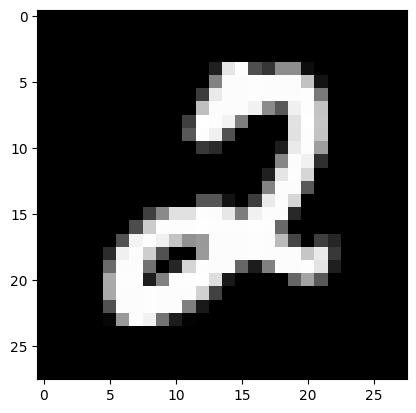

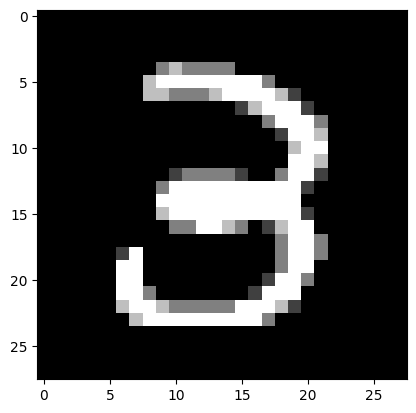

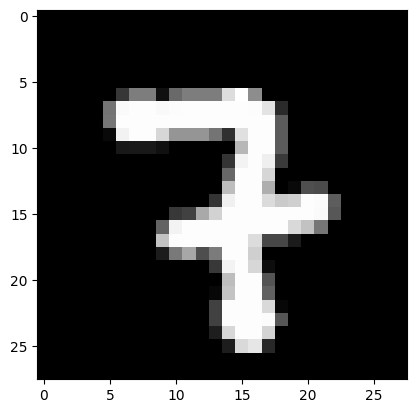

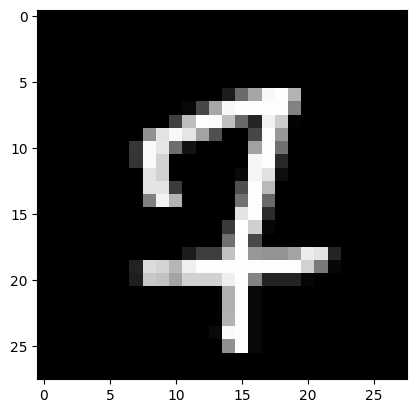

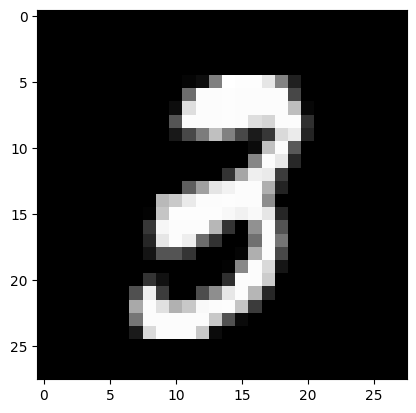

In [17]:
for i in range(5):
  plt.imshow(x.iloc[i].values.reshape(28,28),cmap='gray')
  plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Week7_train.csv")
from sklearn.model_selection import train_test_split
x=df.drop(columns="label")
y=df["label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(y_train.shape)

(31500, 784)
(31500,)


In [2]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [7]:
# 14. Predic the validation set results 
y_pred=knn.predict(x_test)
print(y_pred)

[8 1 9 ... 7 4 4]


In [12]:
# 15.  Print the confusion matrix 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("confusion ma:",confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

confusion ma: [[1022    0    0    0    0    0    3    0    0    0]
 [   0 1143    0    0    0    0    3    0    0    0]
 [   9   17 1014    3    2    2    2   22    1    0]
 [   2    5    4 1110    0   10    2    6    5    7]
 [   2    7    0    0  993    0    3    1    0   18]
 [   2    2    0   19    1  861    9    0    1    3]
 [   8    2    0    0    0    2  997    0    1    0]
 [   0   26    2    0    2    0    0 1088    0   17]
 [   1   14    2   18    3   18    4    1  936    8]
 [   6    3    1   12   10    0    0   14    2  986]]
0.9666666666666667
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1025
           1       0.94      1.00      0.97      1146
           2       0.99      0.95      0.97      1072
           3       0.96      0.96      0.96      1151
           4       0.98      0.97      0.98      1024
           5       0.96      0.96      0.96       898
           6       0.97      0.99      0.98      1010
   

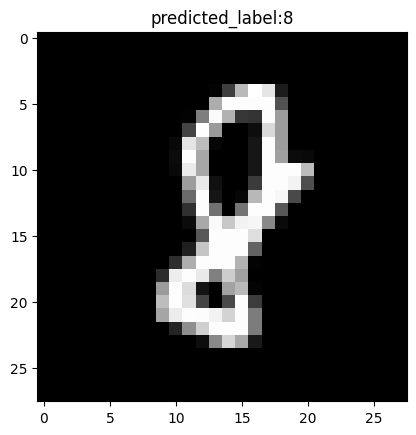

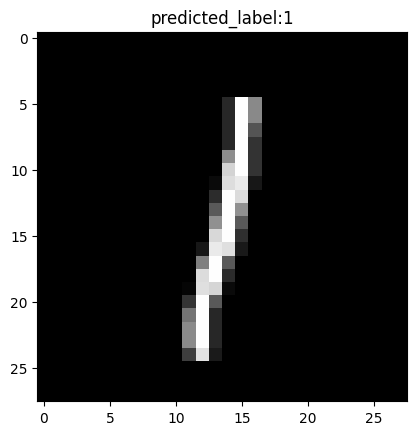

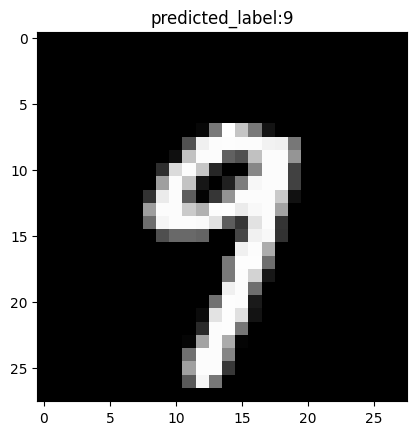

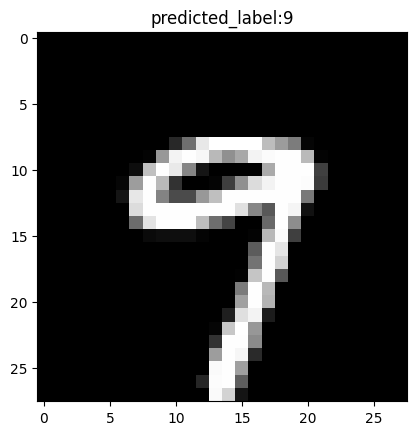

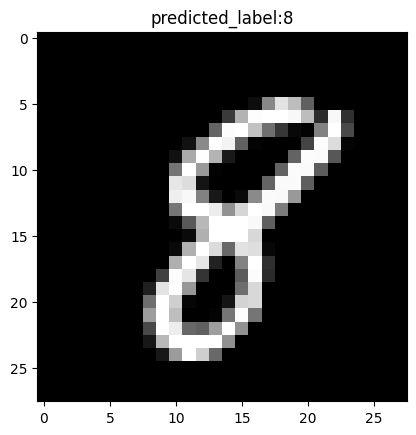

In [17]:
for i in range(5):
     plt.imshow(x_test.iloc[i].values.reshape(28,28),cmap='gray')
     plt.title(f"predicted_label:{y_pred[i]}")
     plt.show()